In [82]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [83]:
# Chave da API obtida no RapidAPI
headers = {
    'x-rapidapi-host': "currency-exchange.p.rapidapi.com",
    'x-rapidapi-key': "97b52f616amsh8ff4be3f936deefp1bcff9jsne88fc0d9a374"
}

url = "https://currency-exchange.p.rapidapi.com/exchange"

# Lista de códigos de moedas para as quais você deseja converter o BRL
# Dentro de pesquisa em sites de investimento, essas seriam as 20 moedas mais utilizadas.
moedas_destino = ['USD', 'EUR', 'JPY', 'GBP', 'AUD', 'CAD', 'CHF', 'CNY', 'SEK', 'NZD', 'MXN', 'NZD', 'SGD', 'HKD','NOK','KRW', 'TRY', 'INR', 'RUB','ZAR'] 

# Lista para armazenar os resultados
resultados = []

# Loop para processar a conversão de BRL para cada moeda de destino
for moeda in moedas_destino:
    # Parametro seria a comparação das outras moedas com o real (BRL)
    params = {"from": "BRL", "to": moeda, "q": "1.0"}
    #requisição GET com os parametros desejados (parametros)
    response = requests.get(url, headers=headers, params=params)
    # Sendo a resposta bem sucedida (code=200) converte a resposta em texto
    if response.status_code == 200:
        # o texto resultado vai para o dicionario 'resultados'
        exchange_rate = response.text
        resultados.append({
            'Moeda Origem': 'BRL',
            'Moeda Destino': moeda,
            'Quantidade': params['q'],
            'Taxa de Câmbio': exchange_rate
        })

#DataFrame com os resultados
df = pd.DataFrame(resultados)

# Criação do arquivo
file_name = 'LEAO_PEREIRA.xlsx'
df.to_excel(file_name, index=False)

print(f"Arquivo '{file_name}' salvo com sucesso!")



Arquivo 'LEAO_PEREIRA.xlsx' salvo com sucesso!


## Exploração da base de dados

* Composiçaõ das primeiras linhas

In [84]:
df.head()

,Moeda Origem,Moeda Destino,Quantidade,Taxa de Câmbio
0,BRL,USD,1.0,0.2007911
1,BRL,EUR,1.0,0.1856224311
2,BRL,JPY,1.0,30.332
3,BRL,GBP,1.0,0.1588960369
4,BRL,AUD,1.0,0.30749952210000003


* tipos dos dados

In [85]:
df.dtypes

Moeda Origem      object
Moeda Destino     object
Quantidade        object
Taxa de Câmbio    object
dtype: object

* Conversão do tipo para um dado que mantenha a maior precisão e ainda possa ser analisado

In [86]:
df['Taxa de Câmbio'] = df['Taxa de Câmbio'].astype(object).astype(float)

df.dtypes

Moeda Origem       object
Moeda Destino      object
Quantidade         object
Taxa de Câmbio    float64
dtype: object

* verificação da existencia de nulos ou vazios

In [87]:
df.isna().sum() / len(df)

Moeda Origem      0.0
Moeda Destino     0.0
Quantidade        0.0
Taxa de Câmbio    0.0
dtype: float64

* obtenção das médias e quartis

In [88]:
df.describe()

,Taxa de Câmbio
count,20.000000
mean,17.977358
std,60.037328
min,0.158896
25%,0.272216
50%,1.499191
75%,4.461232
max,270.780854


* Visualização simples do describe

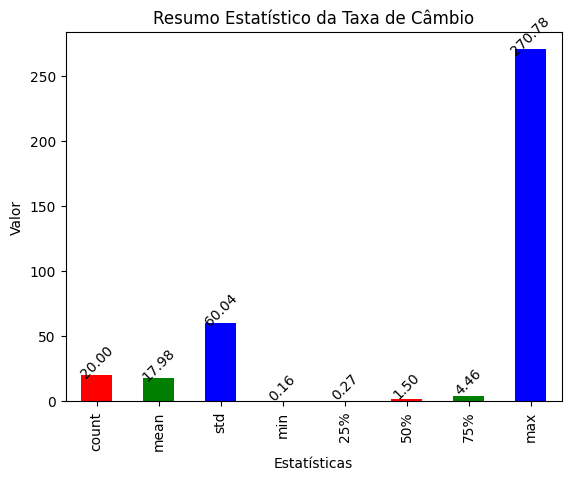

In [89]:
# Variável de armazemento para o grafico
descricao = df['Taxa de Câmbio'].describe()

# Cores diferenciadas para cada barra/quartil
cores = ['red', 'green', 'blue', 'cyan', 'magenta']

# Plote do gráfico de barras com as cores definidas
ax = descricao.plot(kind='bar', color=cores)

# Títulos e rótulos para clareza
plt.title('Resumo Estatístico da Taxa de Câmbio')
plt.xlabel('Estatísticas')
plt.ylabel('Valor')

# Iteração sobre as barras e adicione os rótulos de dados inclinados
for i, p in enumerate(ax.patches):
    # Rótulo com duas casas decimais
    ax.annotate(f"{p.get_height():.2f}", # anotate para posicionar o texto
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                rotation=45)  # Inclinação de 45 graus

# Exibição
plt.show()


Aqui o que temos é basicamente a medida de diferença das outras moedas para o real, visualizando ainda a menor e a maior diferença entre as moedas. Logico que, como os dados são poucos, fica evidente a existencia de pelo menos um outlier que dificultaria a retirada de outras métricas

## Alteração dos dados e tratamento

A partir deste ponto nenhum dos dados serão reais, apenas serão utilizados dados criados para demonstração de conhecimento em codificação


In [90]:
df.head()

,Moeda Origem,Moeda Destino,Quantidade,Taxa de Câmbio
0,BRL,USD,1.0,0.200791
1,BRL,EUR,1.0,0.185622
2,BRL,JPY,1.0,30.332000
3,BRL,GBP,1.0,0.158896
4,BRL,AUD,1.0,0.307500


In [91]:
# Suponha que 'df' é o seu DataFrame existente

# Inserir uma nova linha para a moeda DKK
df.loc[len(df)] = ['BRL', 'DKK', None, None]

# Inserir uma nova linha para a moeda PLN
df.loc[len(df)] = ['BRL', 'PLN', None, None]

# Inserir uma nova linha para a moeda TWD
df.loc[len(df)] = ['BRL', 'TWD', None, None]

# Inserir uma nova linha para a moeda THB
df.loc[len(df)] = ['BRL', 'THB', None, None]

# Inserir uma nova linha para a moeda MYR
df.loc[len(df)] = ['BRL', 'MYR', None, None]

# Exibir o DataFrame atualizado
print(df)


   Moeda Origem Moeda Destino Quantidade  Taxa de Câmbio
0           BRL           USD        1.0        0.200791
1           BRL           EUR        1.0        0.185622
2           BRL           JPY        1.0       30.332000
3           BRL           GBP        1.0        0.158896
4           BRL           AUD        1.0        0.307500
5           BRL           CAD        1.0        0.272799
6           BRL           CHF        1.0        0.181917
7           BRL           CNY        1.0        1.427570
8           BRL           SEK        1.0        2.127356
9           BRL           NZD        1.0        0.334215
10          BRL           MXN        1.0        3.335100
11          BRL           NZD        1.0        0.334215
12          BRL           SGD        1.0        0.270469
13          BRL           HKD        1.0        1.570812
14          BRL           NOK        1.0        2.159526
15          BRL           KRW        1.0      270.780854
16          BRL           TRY  

C:\Users\LeaoN\AppData\Local\Temp\ipykernel_724\999989474.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df.loc[len(df)] = ['BRL', 'DKK', None, None]
C:\Users\LeaoN\AppData\Local\Temp\ipykernel_724\999989474.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df.loc[len(df)] = ['BRL', 'PLN', None, None]
C:\Users\LeaoN\AppData\Local\Temp\ipykernel_724\999989474.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this 

In [92]:
df['Quantidade'] = df['Quantidade'].astype(object).astype(float)

In [93]:
# Calcular a média da coluna 'Quantidade', excluindo os valores nulos
media_quantidade = df['Quantidade'].mean()

# Preencher os valores nulos na coluna 'Quantidade' com a média calculada
df['Quantidade'].fillna(media_quantidade, inplace=True)

# Exibir o DataFrame atualizado
print(df)


   Moeda Origem Moeda Destino  Quantidade  Taxa de Câmbio
0           BRL           USD         1.0        0.200791
1           BRL           EUR         1.0        0.185622
2           BRL           JPY         1.0       30.332000
3           BRL           GBP         1.0        0.158896
4           BRL           AUD         1.0        0.307500
5           BRL           CAD         1.0        0.272799
6           BRL           CHF         1.0        0.181917
7           BRL           CNY         1.0        1.427570
8           BRL           SEK         1.0        2.127356
9           BRL           NZD         1.0        0.334215
10          BRL           MXN         1.0        3.335100
11          BRL           NZD         1.0        0.334215
12          BRL           SGD         1.0        0.270469
13          BRL           HKD         1.0        1.570812
14          BRL           NOK         1.0        2.159526
15          BRL           KRW         1.0      270.780854
16          BR

Agora que a coluna foi preenchida, temos que fazer a mesma coisa com a taxa de cambio. Mas não daria para usar a média, já que não se pode dizer que temos um padrão.Tambem não usaria o desvio padrão pela existencia dos outliers. Para taxas de câmbio, que podem flutuar frequentemente, a interpolação muitas vezes é a escolha preferida, pois ela pode refletir melhor as tendências de curto prazo e as variações diárias

In [94]:
# Realizar a interpolação linear na coluna 'Taxa de Câmbio'
df['Taxa de Câmbio'] = df['Taxa de Câmbio'].interpolate(method='linear', limit_direction='forward', axis=0)

# Exibir o DataFrame atualizado
print(df)

   Moeda Origem Moeda Destino  Quantidade  Taxa de Câmbio
0           BRL           USD         1.0        0.200791
1           BRL           EUR         1.0        0.185622
2           BRL           JPY         1.0       30.332000
3           BRL           GBP         1.0        0.158896
4           BRL           AUD         1.0        0.307500
5           BRL           CAD         1.0        0.272799
6           BRL           CHF         1.0        0.181917
7           BRL           CNY         1.0        1.427570
8           BRL           SEK         1.0        2.127356
9           BRL           NZD         1.0        0.334215
10          BRL           MXN         1.0        3.335100
11          BRL           NZD         1.0        0.334215
12          BRL           SGD         1.0        0.270469
13          BRL           HKD         1.0        1.570812
14          BRL           NOK         1.0        2.159526
15          BRL           KRW         1.0      270.780854
16          BR

### Predição de valores

Uma necessidade até que comum para aqueles que trabalham com taxas de cambio e investimento é tentar se adiantar aos valores do proximo dia. Por isso, a partir de agora, tentarei desenvolver uma predição de valores

primeiro passo é criar uma coluna de data

In [95]:
# Criar uma coluna 'Data' com a data atual
df['Data'] = datetime.today().strftime('%Y-%m-%d')

# Converter a coluna 'Data' para o tipo datetime
df['Data'] = pd.to_datetime(df['Data'])

# Exibir o DataFrame atualizado
print(df)


   Moeda Origem Moeda Destino  Quantidade  Taxa de Câmbio       Data
0           BRL           USD         1.0        0.200791 2024-03-27
1           BRL           EUR         1.0        0.185622 2024-03-27
2           BRL           JPY         1.0       30.332000 2024-03-27
3           BRL           GBP         1.0        0.158896 2024-03-27
4           BRL           AUD         1.0        0.307500 2024-03-27
5           BRL           CAD         1.0        0.272799 2024-03-27
6           BRL           CHF         1.0        0.181917 2024-03-27
7           BRL           CNY         1.0        1.427570 2024-03-27
8           BRL           SEK         1.0        2.127356 2024-03-27
9           BRL           NZD         1.0        0.334215 2024-03-27
10          BRL           MXN         1.0        3.335100 2024-03-27
11          BRL           NZD         1.0        0.334215 2024-03-27
12          BRL           SGD         1.0        0.270469 2024-03-27
13          BRL           HKD     

agora com a coluna criada de base, vamos a criação de dias variados e taxas de cambio variadas, já que o objetivo vai ser tentar achar a taxa do proximo dia

In [96]:
# Crie um novo DataFrame para armazenar as linhas duplicadas
linhas_novas = []

for _, row in df.iterrows():
    # Para um dia a menos (-1 dia)
    row_menos_um_dia = row.copy()
    row_menos_um_dia['Data'] = row['Data'] - timedelta(days=1)
    row_menos_um_dia['Taxa de Câmbio'] = pd.NA  # Deixar a coluna 'Taxa de Câmbio' como NA (missing value)
    linhas_novas.append(row_menos_um_dia)
    
    # Para um dia a mais (+1 dia)
    row_mais_um_dia = row.copy()
    row_mais_um_dia['Data'] = row['Data'] + timedelta(days=1)
    row_mais_um_dia['Taxa de Câmbio'] = pd.NA  # Deixar a coluna 'Taxa de Câmbio' como NA (missing value)
    linhas_novas.append(row_mais_um_dia)

# Converta a lista de linhas novas em um DataFrame
df_novas_linhas = pd.DataFrame(linhas_novas)

# Concatene o DataFrame original com o novo DataFrame de linhas duplicadas
df_final = pd.concat([df, df_novas_linhas], ignore_index=True).sort_values(by='Data')

# Exibir o DataFrame final
print(df_final)


   Moeda Origem Moeda Destino  Quantidade  Taxa de Câmbio       Data
37          BRL           CHF         1.0             NaN 2024-03-26
29          BRL           JPY         1.0             NaN 2024-03-26
31          BRL           GBP         1.0             NaN 2024-03-26
33          BRL           AUD         1.0             NaN 2024-03-26
35          BRL           CAD         1.0             NaN 2024-03-26
..          ...           ...         ...             ...        ...
32          BRL           GBP         1.0             NaN 2024-03-28
30          BRL           JPY         1.0             NaN 2024-03-28
28          BRL           EUR         1.0             NaN 2024-03-28
58          BRL           TRY         1.0             NaN 2024-03-28
74          BRL           MYR         1.0             NaN 2024-03-28

[75 rows x 5 columns]


C:\Users\LeaoN\AppData\Local\Temp\ipykernel_724\2655224336.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_final = pd.concat([df, df_novas_linhas], ignore_index=True).sort_values(by='Data')


Vamos certificar da existencia de valores nulos e unicos

In [97]:
df_final['Taxa de Câmbio'].unique()

array([           nan, 2.00791100e-01, 6.47387300e+00, 3.34214778e-01,
       3.33510000e+00, 1.81917000e-01, 3.79035200e+00, 2.70469200e-01,
       1.57081200e+00, 2.72798600e-01, 2.15952635e+00, 2.70780854e+02,
       3.07499522e-01, 1.42757000e+00, 2.12735560e+00, 1.58896037e-01,
       1.85696629e+01, 3.03320000e+01, 1.67336391e+01, 1.85622431e-01])

In [98]:
df_final = df_final.sort_values(by='Moeda Destino')

In [99]:
df_final.head(10)

,Moeda Origem,Moeda Destino,Quantidade,Taxa de Câmbio,Data
4,BRL,AUD,1.0,0.307500,2024-03-27
34,BRL,AUD,1.0,NaN,2024-03-28
33,BRL,AUD,1.0,NaN,2024-03-26
36,BRL,CAD,1.0,NaN,2024-03-28
35,BRL,CAD,1.0,NaN,2024-03-26
5,BRL,CAD,1.0,0.272799,2024-03-27
38,BRL,CHF,1.0,NaN,2024-03-28
6,BRL,CHF,1.0,0.181917,2024-03-27
37,BRL,CHF,1.0,NaN,2024-03-26
39,BRL,CNY,1.0,NaN,2024-03-26


In [100]:
# Encontrar a taxa de câmbio existente para AUD
taxa_existente = df_final.loc[(df_final['Moeda Destino'] == 'AUD') & (df_final['Taxa de Câmbio'].notna()), 'Taxa de Câmbio'].iloc[0]

# Calcular um valor entre 2 a 5 pontos percentuais acima e abaixo da taxa existente
taxa_mais = taxa_existente * (1 + np.random.uniform(0.02, 0.05))
taxa_menos = taxa_existente * (1 - np.random.uniform(0.02, 0.05))

# Preencher as linhas vazias com os valores calculados
df_final.loc[(df_final['Moeda Destino'] == 'AUD') & (df_final['Taxa de Câmbio'].isna()), 'Taxa de Câmbio'] = [taxa_mais, taxa_menos]

# Exibir o DataFrame atualizado
print(df_final[df_final['Moeda Destino'] == 'AUD'])


   Moeda Origem Moeda Destino  Quantidade  Taxa de Câmbio       Data
4           BRL           AUD         1.0        0.307500 2024-03-27
34          BRL           AUD         1.0        0.320595 2024-03-28
33          BRL           AUD         1.0        0.299646 2024-03-26


agora que o codigo funciona, vamos fazer iteração das moedas que desejo preencher

In [101]:
df_final['Moeda Destino'].unique()

array(['AUD', 'CAD', 'CHF', 'CNY', 'DKK', 'EUR', 'GBP', 'HKD', 'INR',
       'JPY', 'KRW', 'MXN', 'MYR', 'NOK', 'NZD', 'PLN', 'RUB', 'SEK',
       'SGD', 'THB', 'TRY', 'TWD', 'USD', 'ZAR'], dtype=object)

In [102]:

# Lista das moedas desejadas
moedas_desejadas = ['CAD', 'CHF', 'CNY', 'DKK', 'EUR', 'GBP', 'HKD', 'INR',
       'JPY', 'KRW', 'MXN', 'MYR', 'NOK', 'NZD', 'PLN', 'RUB', 'SEK',
       'SGD', 'THB', 'TRY', 'TWD', 'USD'] 

for moeda in moedas_desejadas:
    # Encontrar as linhas para a moeda atual onde a 'Taxa de Câmbio' está vazia
    linhas_vazias = df_final[(df_final['Moeda Destino'] == moeda) & (df_final['Taxa de Câmbio'].isna())].index
    
    # Se houver linhas vazias, preencha-as
    if len(linhas_vazias) > 0:
        # Encontrar a taxa de câmbio existente para a moeda atual
        taxa_existente = df_final.loc[(df_final['Moeda Destino'] == moeda) & (df_final['Taxa de Câmbio'].notna()), 'Taxa de Câmbio'].iloc[0]

        # Gerar valores aleatórios entre 2 a 5 pontos percentuais acima e abaixo da taxa existente
        taxas_ajustadas = taxa_existente * (1 + np.random.uniform(-0.05, 0.05, len(linhas_vazias)))

        # Preencher as linhas vazias com os valores calculados para a moeda atual
        df_final.loc[linhas_vazias, 'Taxa de Câmbio'] = taxas_ajustadas

# Exibir o DataFrame atualizado para as moedas desejadas
print(df_final[df_final['Moeda Destino'].isin(moedas_desejadas)])


   Moeda Origem Moeda Destino  Quantidade  Taxa de Câmbio       Data
36          BRL           CAD         1.0        0.281754 2024-03-28
35          BRL           CAD         1.0        0.262126 2024-03-26
5           BRL           CAD         1.0        0.272799 2024-03-27
38          BRL           CHF         1.0        0.188880 2024-03-28
6           BRL           CHF         1.0        0.181917 2024-03-27
..          ...           ...         ...             ...        ...
69          BRL           TWD         1.0        3.714974 2024-03-26
22          BRL           TWD         1.0        3.790352 2024-03-27
25          BRL           USD         1.0        0.203390 2024-03-26
26          BRL           USD         1.0        0.203600 2024-03-28
0           BRL           USD         1.0        0.200791 2024-03-27

[69 rows x 5 columns]


In [103]:
df_final.isna().sum()

Moeda Origem      0
Moeda Destino     0
Quantidade        0
Taxa de Câmbio    2
Data              0
dtype: int64

In [104]:
# Identificar as datas que estão faltando para ZAR
datas_existentes = df_final[df_final['Moeda Destino'] == 'ZAR']['Data']
data_min = datas_existentes.min()
data_max = datas_existentes.max()
todas_datas = pd.date_range(start=data_min, end=data_max, freq='D')
datas_faltando = todas_datas.difference(datas_existentes)

# Criar um DataFrame com as datas faltando para ZAR
dados_a_prever = pd.DataFrame({'Moeda Origem': 'BRL', 
                               'Moeda Destino': 'ZAR', 
                               'Quantidade': [None] * len(datas_faltando), 
                               'Taxa de Câmbio': [None] * len(datas_faltando), 
                               'Data': datas_faltando})



In [105]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_final['Moeda Origem'] = le.fit_transform(df_final['Moeda Origem'])

In [107]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Suponha que 'df_final' é o seu DataFrame existente

df_final['Data'] = pd.to_datetime(df_final['Data']).view('int64') // 10**9
# Mapear 'Moeda Destino' para valores numéricos
mapeamento_moedas = {
    'AUD': 0, 'CAD': 1, 'CHF': 2, 'CNY': 3, 'DKK': 4, 'EUR': 5, 'GBP': 6, 'HKD': 7, 'INR': 8,
    'JPY': 9, 'KRW': 10, 'MXN': 11, 'MYR': 12, 'NOK': 13, 'NZD': 14, 'PLN': 15, 'RUB': 16, 'SEK': 17,
    'SGD': 18, 'THB': 19, 'TRY': 20, 'TWD': 21, 'USD': 22, 'ZAR': 23
}
df_final['Moeda Destino Num'] = df_final['Moeda Destino'].map(mapeamento_moedas)

# Remover a coluna original 'Moeda Destino'
df_final = df_final.drop('Moeda Destino', axis=1)

# Preparar os dados
X = df_final.drop('Taxa de Câmbio', axis=1)
Y = df_final['Taxa de Câmbio']

# Tratar valores ausentes nas colunas numéricas
medias = X.select_dtypes(include=[np.number]).mean()
X.fillna(medias, inplace=True)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Escolher um modelo
modelo = LinearRegression()

X_train = X_train[Y_train.notnull()]
Y_train = Y_train[Y_train.notnull()]

# Treinar o modelo
modelo.fit(X_train, Y_train)

# Fazer previsões
Y_pred = modelo.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(Y_test, Y_pred)
print(f"Erro Quadrático Médio: {mse}")

# Preparar os dados dos dias faltando para ZAR
# Suponha que 'dados_a_prever' é um DataFrame com os dados dos dias que estão faltando para ZAR
# Certifique-se de que 'dados_a_prever' contém todas as colunas necessárias, exceto 'Taxa de Câmbio'
# e que todas as colunas foram tratadas da mesma forma que os dados de treinamento

# Prever a 'Taxa de Câmbio' para a moeda ZAR nos dias que estão faltando
previsoes_ZAR = modelo.predict(dados_a_prever)


KeyError: 'Moeda Destino'

In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# Suponha que 'df_final' é o seu DataFrame existente

# Converter 'Moeda Origem' e 'Moeda Destino' para numérico usando one-hot encoding
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df_final[['Moeda Origem', 'Moeda Destino']])

# Criar um novo DataFrame com as características codificadas
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

# Concatenar o novo DataFrame com as características codificadas ao original, excluindo as colunas categóricas
df_final = pd.concat([df_final.drop(['Moeda Origem', 'Moeda Destino'], axis=1), encoded_df], axis=1)

# Converter 'Quantidade' para float
df_final['Quantidade'] = df_final['Quantidade'].astype(float)

# Separar os dados em características (X) e alvo (Y)
X = df_final.drop('Taxa de Câmbio', axis=1)
Y = df_final['Taxa de Câmbio']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Remover linhas com NaN na variável alvo do conjunto de treinamento
X_train = X_train[Y_train.notnull()]
Y_train = Y_train[Y_train.notnull()]

# Treinar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, Y_train)

# Fazer previsões no conjunto de teste
Y_pred = modelo.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(Y_test, Y_pred)
print(f"Erro Quadrático Médio: {mse}")

# Preparar os dados para prever os valores ausentes
dados_a_prever = X[Y.isnull()]

# Prever os valores ausentes
previsoes = modelo.predict(dados_a_prever)

# Preencher os valores ausentes com as previsões
df_final.loc[Y.isnull(), 'Taxa de Câmbio'] = previsoes


KeyError: "['Moeda Destino'] not in index"